## Multiple Linear Regression

Linear regression assumes a linear relationship between the label and features. This means that we believe the relationship can be expressed as a straight line equation:

$y = f(x) = wx + b$

Considering we have more than one feature, and more than one test example, we can generalize the above equation as a prediction hypothesis to compute a vector of $\hat{y}$


$\overrightarrow{\hat{y}} = \overrightarrow{w}\cdot X+b$

Another way to write the above equation would be:

$\begin{bmatrix}y_1\\\vdots\\y_m\end{bmatrix} = \begin{bmatrix}w_1\\\vdots\\w_n\end{bmatrix}\cdot \begin{bmatrix}x_{11} & \cdots & x_{1n} \\\vdots & \ddots & \vdots \\x_{m1} & \cdots & x_{mn}\end{bmatrix} + \begin{bmatrix}\vdots\\b\\\vdots\end{bmatrix}$




Now that we have the hypothesis to predict the label from multiple features lets start with the implementation.

### 1. Data generation.

We will use a pre-built library to create an ad-hoc dataset for our excercise. Using this library is very helpful because in this way we can skip the feature selection, and feature engineering processes. 

Nevertheless, whenever you want to compute predictions with your own data take into consideration that you will need to run into the feature selection, and feature engineering processes to ensure your model will perform well with unknown data.


#### Libraries import

In [817]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Data generation

In [819]:
X, y = make_regression(n_samples = 200, n_features = 3, random_state = 42, noise = 50)
y = y.reshape(200, 1)

#### Data visual inspection

#### Features histogram

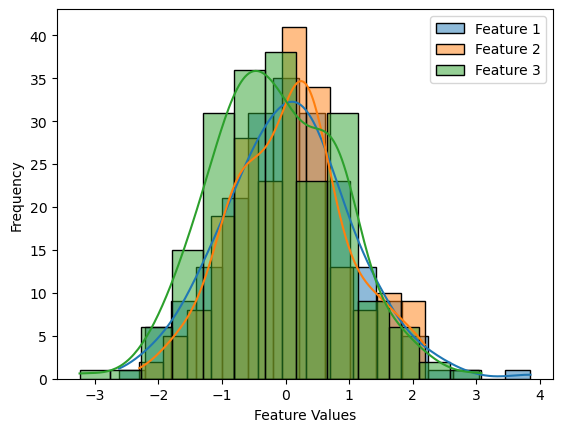

In [822]:
sns.histplot(X[:, 0], kde=True, label='Feature 1')
sns.histplot(X[:, 1], kde=True, label='Feature 2')
sns.histplot(X[:, 2], kde=True, label='Feature 3')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Traning/Test sets creation

In [824]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets define the functions we will use to implement the **Multiple Linear Regression**

#### 1. The Cost function
\begin{equation}J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y_{(i)})^{2}\end{equation}

In [826]:
def compute_loss(X, y, w, b, m):
    y_hat = np.dot(X, w) + b
    loss = (1 / (2* m)) * np.sum((y_hat - y)**2)
    return loss

#### 2. The compute gradients function 
\begin{equation}
\frac{\delta J(w,b)}{\delta w} = \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})x^{(i)} \\
\frac{\delta J(w,b)}{\delta b} = \frac{1}{m}\sum_{i=1}^{m}(f_{w,b}(x^{(i)})-y^{(i)})
\end{equation}

In [828]:
def compute_gradients(X, y, w, b, m):
    y_hat = np.dot(X, w) + b
    error = y_hat - y
    dj_dw = (1 / m) * np.sum(error * X, axis = 0)
    dj_db = (1 / m) * np.sum(error)        
    return dj_dw, dj_db

#### 3. The optimization function (gradient descent)

\begin{equation}
w = w-\alpha\frac{\delta J(w,b)}{\delta w}\\
b = b-\alpha\frac{\delta J(w,b)}{\delta b}
\end{equation}

In [831]:
def compute_optimization(learning_rate, w, b, dj_dw, dj_db):
    w_new = w - (learning_rate * dj_dw)
    b_new = b - (learning_rate * dj_db)
    return w_new, b_new

#### 4. The fit (training) function

In [833]:
def fit(epochs, learning_rate, X, y, w, b, debug):                
    m, n = X.shape
    
    losses = list() #tracking purposes
    
    for epoch in range(epochs):

        loss = compute_loss(X, y, w, b, m)        
        losses.append(loss)        

        dj_dw, dj_db = compute_gradients(X, y, w, b, m)            
        w_new, b_new = compute_optimization(learning_rate, w, b, dj_dw, dj_db)
                
        w = w_new
        b = b_new

        # print
        if (debug and (epoch % 50) == 0):
            print(f"epoch: {epoch}, loss: {loss}")            

    return w, b, losses

### Training model

In [835]:
epochs = 500
learning_rate = 0.01

m, n = X_train.shape

w = np.random.rand(n,1)
b = np.random.rand(1)

w, b, loss = fit(epochs, learning_rate, X_train, y_train, w, b, True)
w, b

epoch: 0, loss: 6481.19706852502
epoch: 50, loss: 11934.017769671918
epoch: 100, loss: 9449.670444659005
epoch: 150, loss: 8655.352113017105
epoch: 200, loss: 8437.914108710052
epoch: 250, loss: 8403.399948046193
epoch: 300, loss: 8416.83324843945
epoch: 350, loss: 8435.886503266926
epoch: 400, loss: 8449.915210314573
epoch: 450, loss: 8458.107631834515


(array([[72.62417598, 19.31613614, 70.54963168],
        [73.26505278, 19.95701294, 71.19050848],
        [73.35355682, 20.04551698, 71.27901252]]),
 array([-7.92562074]))

#### Cost minimization over iterations

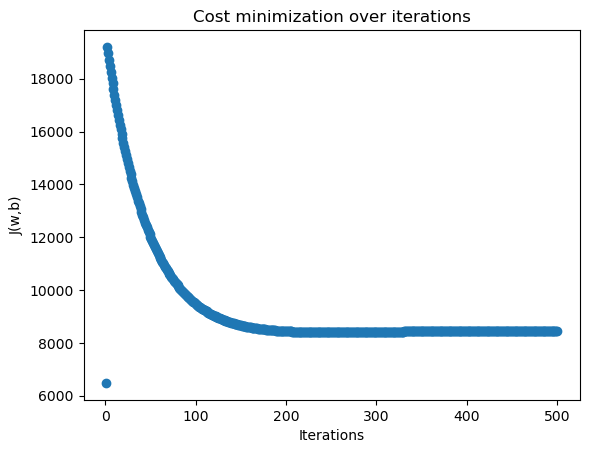

In [837]:
plt.scatter(np.linspace(1, epochs, epochs), loss)
plt.title("Cost minimization over iterations")
plt.xlabel("Iterations")
plt.ylabel("J(w,b)")
plt.show()

### Prediction and evaluation

#### Prediction function

In [840]:
def predict(X):
    return np.dot(X, w[0]) + b

#### Compute predictions for the test dataset

In [842]:
y_pred = predict(X_test)
score = r2_score(y_test, y_pred)
score

0.7075537181411828